#**SE IMPORTAN LOS RESULTADOS CORRESPONDIENTES A 2019-1 & 2019-2 LOS CUALES ABARCAN DE LA S1 A S8 (EVALUACIÓN POR LOGROS)**



**Se declaran los modulos requeridos:**

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import requests

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Se cargan los respectivos los archivos de excel 20191s1tos8 y 20192s2tos8 Pre-procesados en C++:**

Con el método pd.read_excel() se crea un diccionario para el semestre 20191 y semestre 20192 los cuales estaran compuestos por sus respectivas hojas. Las keys de cada diccionario son las respectivas hojas que componen cada archivo de excel y estas almacenan el contenido de dichas hojas como Dataframe


In [146]:
# path = '/content/drive/My Drive/PDG/propuesta de unificación/NotebookProyecto'
# path20191 = '/content/drive/My Drive/PDG/propuesta de unificación/NotebookProyecto/20191s1tos8.XLSX'
# path20192 = '/content/drive/My Drive/PDG/propuesta de unificación/NotebookProyecto/20192s1tos8.XLSX'
path = '/content/drive/My Drive/PDG/propuesta de unificación/NotebookProyecto'
path20191 = 'https://github.com/Baronco/data_text/blob/master/20191s1tos8.XLSX?raw=true'
path20192 = 'https://github.com/Baronco/data_text/blob/master/20192s1tos8.XLSX?raw=true'
s20191 = pd.read_excel(path20191,sheet_name = None,index_col=0,header=0)
s20192 = pd.read_excel(path20192,sheet_name = None,index_col=0,header=0)

##**Visualización de cada Dataframe contenido en s20191 correspondiente a los datos del semestre 2019-1**


In [147]:
for hoja,df in s20191.items():
  print('***',hoja,'***:\n',df.head())

*** 20191s1 ***:
                    game1  game2  game3  game4  ...  game43  game44  game45  game46
student                                        ...                                
Jose Bustos            2      0      0     -1  ...      -1      -1      -1      -1
Juliana Gonzales       0      0      0      0  ...      -1      -1      -1      -1
Gabriel Jaramillo      0      0      0      1  ...      -1      -1      -1      -1
Juan Latorre           0      0      0      0  ...      -1      -1      -1      -1
Juan Mendez            0      0     -1     -1  ...      -1      -1      -1      -1

[5 rows x 46 columns]
*** 20191s2 ***:
                    game1  game2  game3  game4  ...  game27  game28  game29  game30
student                                        ...                                
Jose Bustos            0      0      0      0  ...      -1      -1      -1      -1
Andres Diaz            0      2      0      2  ...      -1      -1      -1      -1
Juliana Gonzales       0    

##**Visualización de cada Dataframe contenido en s20192 correspondiente a los datos del semestre 2019-2**

Recordemos que en estre semestre la semana 7 como tal no existió


In [148]:
for hoja,df in s20192.items():
  print('***',hoja,'***:\n',df.head())

*** 20192s1 ***:
                           game1  game2  game3  ...  game34  game35  game36
student                                        ...                        
Dominguez Rodriguez Juan      0      2     -1  ...      -1      -1      -1
Duque Gomez Valeria           0      1     -1  ...      -1      -1      -1
Echeverri Guzman Nikolas      0      1      0  ...      -1      -1      -1
Escobar Vargas Juan           1      1      0  ...      -1      -1      -1
Garces Orejuela Liceth        0      0      0  ...      -1      -1      -1

[5 rows x 36 columns]
*** 20192s2 ***:
                           game1  game2  game3  ...  game62  game63  game64
student                                        ...                        
Dominguez Rodriguez Juan      2      0      0  ...      -1      -1      -1
Duque Gomez Valeria           0      2      2  ...      -1      -1      -1
Echeverri Guzman Nikolas      0      0      2  ...      -1      -1      -1
Escobar Vargas Juan           2      2   

##**PRE-LIMPIEZA DE DATOS**

Recordemos que los valores "-1" representan que el estudiante no obtuvo resultado debido a que no continuó jugando. Por esto es necesario que estos valores "-1" se conviertan en valore np.nan para que puedan ser tratados por los diferentes métodos de los modulos numpy y pandas sin problema alguno.

Remplazo de valores **-1** por valores np.nan para **s20191**

In [149]:
for hoja,df in s20191.items():
  s20191[hoja] = df.replace(to_replace=-1,value=np.nan)

In [150]:
for hoja,df in s20192.items():
  s20192[hoja] = df.replace(to_replace=-1,value=np.nan)

#**VISUALIZACIÓN RESULTADOS POR SEMANA**



Se apilan los resultados de cada semestre para generar sus respectivos diagramas de barras:

In [151]:
def stack_df(df_dicts):
  stack_dict = {}
  for hoja,df in df_dicts.items():
    stack_dict[hoja] = df_dicts[hoja].stack().value_counts().sort_index()
  return stack_dict

#Diccionarios de dataframes
stack_20191 = stack_df(s20191)
stack_20192 = stack_df(s20192)

Se procede a verificar si cada semana de cada semestre cuenta con sus cuatro categorias (MALO, BUENO, REGULAR, EXCELENTE):

In [152]:
PRUEBA = []

def prueba(lista, df_):
  for hoja,df in df_.items():
    if df_[hoja].shape[0] != 4:
      lista.append(hoja)

prueba(PRUEBA,stack_20191)
prueba(PRUEBA,stack_20192)

Para el semestre 2019-1 las semanas 2,5 y 8 presentan 1 resultado nulo (1:Regular, 3:Excelente y 3:Excelente respectivamente)


In [153]:
for key in PRUEBA:
  if key in stack_20191:
    print(key,'\n',stack_20191[key],'\n')

20191s2 
 0.0    242
2.0     89
3.0      3
dtype: int64 

20191s5 
 0.0    147
1.0      1
2.0     35
dtype: int64 

20191s8 
 0.0    40
1.0     7
2.0    54
dtype: int64 



Para el semestre 2019-2 la semana 5 presenta 1 resultado nulo (1:Regular)


In [154]:
for key in PRUEBA:
  if key in stack_20192:
    print(key,'\n',stack_20192[key],'\n')

20192s5 
 0.0    303
2.0    203
3.0      5
dtype: int64 



##**ADECUACIÓN DE LOS DATOS PARA DIAGRAMA DE BARRAS DE RESULTADOS POR SEMESTRE**

Esta función se encargar de rellenar los resultados nulos con valor de 0 para poder ser ploteado:

In [155]:
def void_states(void_states,dict_df):
  for state in void_states:
    if state in dict_df:
      state_list = list(dict_df[state].index)
      for i in range(0,4):
        if i not in state_list:
          
          series_state = pd.Series(0.0, index=[float(i)])
          
          dict_df[state] = dict_df[state].append(series_state)
          dict_df[state] = dict_df[state].sort_index()     

void_states(PRUEBA,stack_20191)
void_states(PRUEBA,stack_20192)

Comprobamos que todos los estados esten presentes en cada semestre:

In [156]:
stack_20191

{'20191s1': 0.0    225
 1.0     31
 2.0     38
 3.0      7
 dtype: int64, '20191s2': 0.0    242.0
 1.0      0.0
 2.0     89.0
 3.0      3.0
 dtype: float64, '20191s3': 0.0    60
 1.0    57
 2.0    61
 3.0     8
 dtype: int64, '20191s4': 0.0    72
 1.0    90
 2.0    71
 3.0    12
 dtype: int64, '20191s5': 0.0    147.0
 1.0      1.0
 2.0     35.0
 3.0      0.0
 dtype: float64, '20191s6': 0.0    56
 1.0     6
 2.0    79
 3.0     1
 dtype: int64, '20191s7': 0.0    36
 1.0     7
 2.0    63
 3.0     1
 dtype: int64, '20191s8': 0.0    40.0
 1.0     7.0
 2.0    54.0
 3.0     0.0
 dtype: float64}

In [157]:
stack_20192

{'20192s1': 0.0    140
 1.0     31
 2.0     58
 3.0      7
 dtype: int64, '20192s2': 0.0    237
 1.0      3
 2.0    133
 3.0      2
 dtype: int64, '20192s3': 0.0    42
 1.0    47
 2.0    65
 3.0    14
 dtype: int64, '20192s4': 0.0    50
 1.0    55
 2.0    55
 3.0    14
 dtype: int64, '20192s5': 0.0    303.0
 1.0      0.0
 2.0    203.0
 3.0      5.0
 dtype: float64, '20192s6': 0.0    76
 1.0    14
 2.0    87
 3.0     8
 dtype: int64, '20192s8': 0.0    47
 1.0     4
 2.0    54
 3.0     2
 dtype: int64}

In [158]:
#PARAMETROS GENERALES DE CADA BAR CHART
bar_positions = np.arange(4) + 1
tick_position = range(1,5)
colorbars = [(255/255,188/255,121/255),(255/255,128/255,14/255),(162/255,200/255,236/255),(95/255,158/255,209/255)]

def barcharts(fig, stack_df, rows, columns,semestre):
  df_size = len(stack_df)
  keys = list(stack_df.keys())
  
  for i in range(0,df_size):
    ax = fig.add_subplot(rows,columns,i+1)
    bar = ax.bar(bar_positions,stack_df[keys[i]].values,width=0.5,color=colorbars)
    ax.set_xticks(tick_position)
    ax.set_xticklabels(['Malo','Regular','Bueno','Excelente'],fontsize=12)
    # ax.set_xlabel('Resultados',fontsize=15)
    # ax.set_ylabel('Partidas jugadas',fontsize=15)
    ax.set_yticklabels([])
    ax.tick_params(bottom=False,left=False,labelbottom=False)
    if (i+1) > 4:
      ax.tick_params(labelbottom=True)
    plt.title(str(keys[i]) + ' Total partidas: '+str(int(stack_df[keys[i]].sum())),fontsize=12,ha='center')
    for spine in ax.spines:
      ax.spines[spine].set_visible(False)
    
    label_list = stack_df[keys[i]].values
    for i in range(0,4):
      ax.text(bar_positions[i],label_list[i]+0.08,int(label_list[i]),fontsize=10,ha='center',va='bottom')

##**BAR CHART 2019S1**

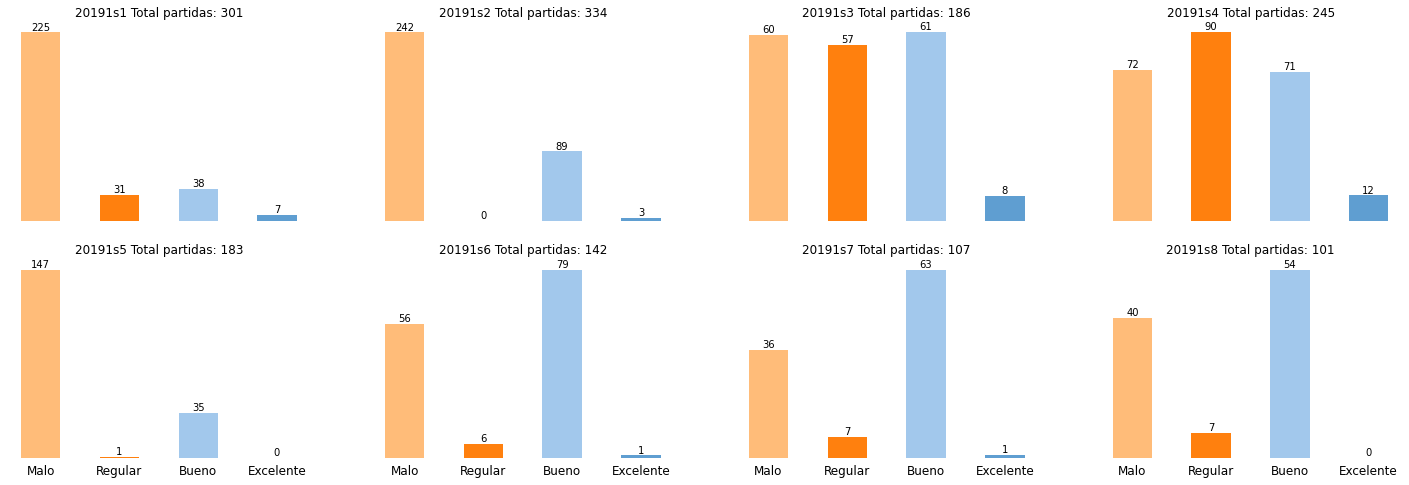

In [159]:
fig = plt.figure(figsize=(25,8))
barcharts(fig,stack_20191,2,4,'2019-1')
#plt.savefig(f'/content/drive/My Drive/PDG/propuesta de unificación/NotebookProyecto/Resultados20191.png')

##**BAR CHART 2019S2**

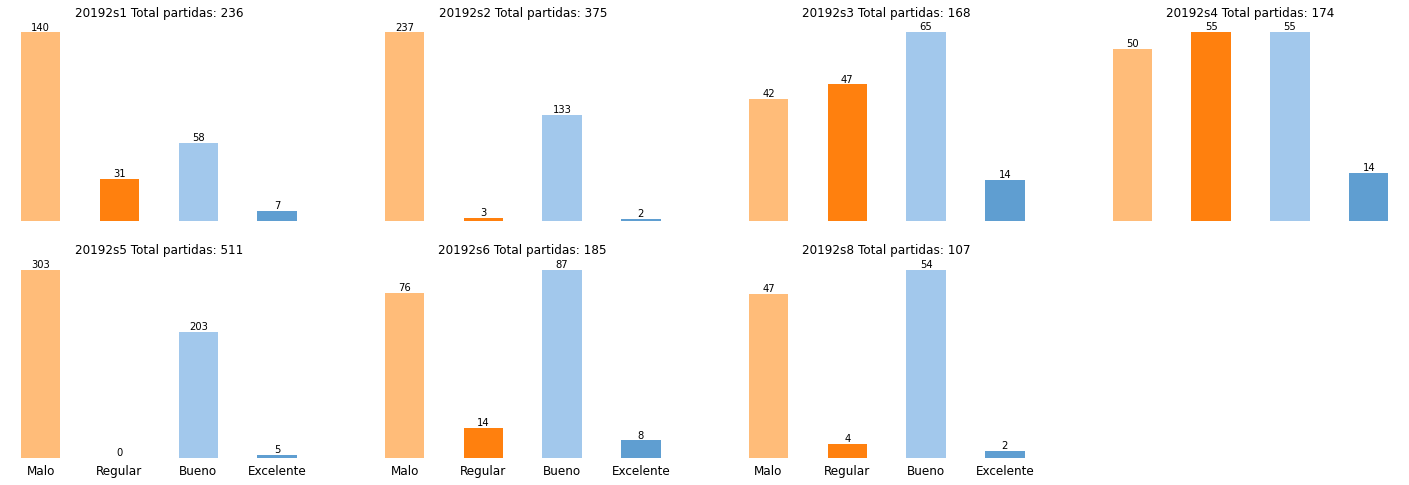

In [160]:
fig2 = plt.figure(figsize=(25,8))
barcharts(fig2,stack_20192,2,4,'2019-2')
#plt.savefig(f'/content/drive/My Drive/PDG/propuesta de unificación/NotebookProyecto/Resultados20192.png')

##**Almacenamos el stack de resultados de cada semestre como dataframes para luego ser exportados como excel**


**stack_20191:**

In [161]:
stack_20191_df = pd.DataFrame(stack_20191) 
stack_20191_df = stack_20191_df.rename({0.0: 'Malo', 1.0: 'Regular',2.0:'Bueno',3.0:'Excelente'})
stack_20191_df

,20191s1,20191s2,20191s3,20191s4,20191s5,20191s6,20191s7,20191s8
Malo,225,242.0,60,72,147.0,56,36,40.0
Regular,31,0.0,57,90,1.0,6,7,7.0
Bueno,38,89.0,61,71,35.0,79,63,54.0
Excelente,7,3.0,8,12,0.0,1,1,0.0


**stack_20192:**

In [162]:
stack_20192_df = pd.DataFrame(stack_20192) 
stack_20192_df = stack_20192_df.rename({0.0: 'Malo', 1.0: 'Regular',2.0:'Bueno',3.0:'Excelente'})
stack_20192_df

,20192s1,20192s2,20192s3,20192s4,20192s5,20192s6,20192s8
Malo,140,237,42,50,303.0,76,47
Regular,31,3,47,55,0.0,14,4
Bueno,58,133,65,55,203.0,87,54
Excelente,7,2,14,14,5.0,8,2


##**Combinamos los dataframes y exportamos a formato .xlsx:**

In [163]:
stack_combined = pd.merge(left=stack_20191_df,right=stack_20192_df,left_index=True, right_index=True)
#stack_combined.to_excel(path+'/Resultados_2019.xlsx')
stack_combined 

,20191s1,20191s2,20191s3,20191s4,20191s5,20191s6,20191s7,20191s8,20192s1,20192s2,20192s3,20192s4,20192s5,20192s6,20192s8
Malo,225,242.0,60,72,147.0,56,36,40.0,140,237,42,50,303.0,76,47
Regular,31,0.0,57,90,1.0,6,7,7.0,31,3,47,55,0.0,14,4
Bueno,38,89.0,61,71,35.0,79,63,54.0,58,133,65,55,203.0,87,54
Excelente,7,3.0,8,12,0.0,1,1,0.0,7,2,14,14,5.0,8,2


# **ADECUACIÓN DE LOS DATAFRAMES PARA CONTEO DE TRANSICIONES**

Para realizar el conteo de transiciones primero debemos convertir cada dato a tipo object (string) para poder usar las funciones de stringsfor 

In [164]:
def to_str(data):
  if data == 0 or data == 1 or data == 2 or data == 3:
    return str(data)[0]
  
def adecuacion(dict_df):
  for k,df in dict_df.items():
    dict_df[k] = df.applymap(to_str)

adecuacion(s20191)
adecuacion(s20192)

Se insertan las transiciones a cada dataframe:

In [165]:
def listaResultados(dict_df):
  listaResult = []
  listaResultSemestre = []
  for k,v in dict_df.items():
    df = dict_df[k]
    rows = df.shape[0]
    for i in range(0,rows):
      flags = df.iloc[i].notnull()
      listaResult.append(''.join(df.iloc[i][flags].tolist()))
    dict_df[k]['Transitions'] = pd.Series(listaResult,dict_df[k].index.tolist())
    listaResult = []


listaResultados(s20191)
listaResultados(s20192)

Transiciones para 2019-1:

In [166]:
for k,v in s20191.items():
  print('**',k+'**\n',s20191[k]['Transitions'].head(),'\n')

** 20191s1**
 student
Jose Bustos                         200
Juliana Gonzales               00000000
Gabriel Jaramillo                  0001
Juan Latorre         000000020200000022
Juan Mendez                          00
Name: Transitions, dtype: object 

** 20191s2**
 student
Jose Bustos                     00000
Andres Diaz                     02022
Juliana Gonzales     0000000000000000
Juan Guerra               00000000220
Gabriel Jaramillo       2022222022020
Name: Transitions, dtype: object 

** 20191s3**
 student
Jose Bustos                  1312
Andres Diaz                  0222
Juliana Gonzales     121001221012
Juan Guerra                011110
Gabriel Jaramillo          111111
Name: Transitions, dtype: object 

** 20191s4**
 student
Jose Bustos           1120
Andres Diaz          11221
Juliana Gonzales        00
Juan Guerra           0101
Gabriel Jaramillo     1102
Name: Transitions, dtype: object 

** 20191s5**
 student
Jose Bustos                      00
Andres Diaz        

Transiciones para 2019-2:

In [167]:
for k,v in s20192.items():
  print('**',k+'**\n',s20192[k]['Transitions'].head(),'\n')

** 20192s1**
 student
Dominguez Rodriguez Juan        02
Duque Gomez Valeria             01
Echeverri Guzman Nikolas      0102
Escobar Vargas Juan           1101
Garces Orejuela Liceth      000020
Name: Transitions, dtype: object 

** 20192s2**
 student
Dominguez Rodriguez Juan    20000
Duque Gomez Valeria           022
Echeverri Guzman Nikolas      002
Escobar Vargas Juan           222
Garces Orejuela Liceth       0002
Name: Transitions, dtype: object 

** 20192s3**
 student
Dominguez Rodriguez Juan      33
Duque Gomez Valeria           13
Echeverri Guzman Nikolas    2021
Escobar Vargas Juan         2121
Garces Orejuela Liceth      0202
Name: Transitions, dtype: object 

** 20192s4**
 student
Dominguez Rodriguez Juan    120101022
Duque Gomez Valeria           0022012
Echeverri Guzman Nikolas           20
Escobar Vargas Juan               022
Madriñan Zuluaga Martin            22
Name: Transitions, dtype: object 

** 20192s5**
 student
Dominguez Rodriguez Juan    0002
Duque Gomez Valer

# **CONTEO DE TRANSICIONES**


Para este caso el conteo de las transicones se aplica a cuatro posibles estados **'MALO, REGULAR, BUENO y EXCELENTE'** por lo cual requerimos de 16 patrones de busqueda que facilmente podemos escribir a mano:

In [168]:
patron =[['00','01','02','03'],
         ['10','11','12','13'],
         ['20','21','22','23'],
         ['30','31','32','33']]
patron

[['00', '01', '02', '03'],
 ['10', '11', '12', '13'],
 ['20', '21', '22', '23'],
 ['30', '31', '32', '33']]

## **FUNCIÓN DE RECURRENCIAS:**

Esta función requiere como entradas el **patrón** de las recurrencias a contar,la **lista de recurrencias** y el **nombre de los estados**, por ejemplo:

`test = ['111111','31310','01012','23012']`
>La dimensión de esta lista es de 4 elementos, lo que me representa los resultados de 4 estudiantes.

El nombre de los estados se debe pasar como una lista:

`nombres = ['Malo','Bueno', 'Regular', 'Excelente']`

La función **retornará un dataframe** con sus respectivos conteos de transiciones.

In [169]:
# La especicación del ancho a buscar viene dada por la dimensión de los patrones individuales a buscar, en este caso dimensión 2 (Matriz de orden 1)
def recurrencias(patron,lista,states):
    count = [[0,0,0,0],
             [0,0,0,0],
             [0,0,0,0],
             [0,0,0,0]]
    for i in range(0,len(lista)): # elementos que contiene la lista de recurrencias (filas)
        
        for j in range(0,len(lista[i]) - len(patron[0][0]) + 1): # Iteración de cada caracter del string
            
            for k in range(0,len(patron)):  # Iteración sobre los 16 patrones de busqueda
                for l in range(0,len(patron[0])):

                    if lista[i].count(patron[k][l],j,j+len(patron[0][0])) != 0 :
                        count[k][l] += 1
                        # print('patron',patron[k][l],':',lista[i].count(patron[k][l],j,j+len(patron[0][0])))
    df_recurrencias = pd.DataFrame(count,index = states,columns = states)
    return df_recurrencias

#Si el ancho de la recurrencia es 6 y el ancho del patron a buscar es 2 la busqueda se debería hacer hasta la posición 4
#El comportamiento de la función range hará que se recorra el string hasta la posición 3, para evitar esto sumamos una unidad para que recorra #hasta la posición 4
#for i in range(0,5):
# 0|1|2|3|4|5|*6*|

## **TEST DE CONTEO DE RECURRENCIAS:**

Este test se aplicará al semestre 2019-1 semana 1

In [170]:
test = s20191['20191s1']['Transitions'].to_list()
transiciones_20191s1 =  recurrencias(patron,test,['Malo','Bueno', 'Regular', 'Excelente'])
transiciones_20191s1

,Malo,Bueno,Regular,Excelente
Malo,164,27,24,2
Bueno,23,1,1,0
Regular,22,0,9,2
Excelente,1,0,1,2


Comparamos este resultado con el obtenido a través del algoritmo de C++ que inicialmente usamos:

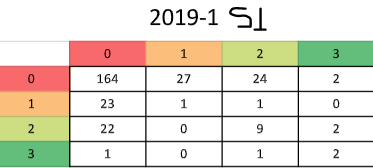

El resultado obtenido es el mismo, se procede ahora sí a realizar los conteos de cada semestre.

Resta contemplar la posibilidad de existencia de estados sin recurrencias para lo cual se decide que al no tener registros también es lo mismo decir que cada estado tiene las mismas posibilidades de transición, con esto se rellena con unos.


# **CONTEO DE RECURRENCIAS DEFINITIVO:**
Se procede a crear un diccionario de dataframes que contendrá cada conteo de cada semana y adecuamos los casos donde las transiciones de un estado hacia los demás sean cero:

In [171]:
def conteo(dict_df):
  contar = {}
  for k,v in dict_df.items():
    series = dict_df[k]['Transitions'].to_list()
    contar[k] = recurrencias(patron,series,['Malo','Bueno', 'Regular', 'Excelente'])
    contar[k][contar[k].sum(axis=1) == 0] = 1
  return contar

transiciones_s20191 = conteo(s20191)
transiciones_s20192 = conteo(s20192)

## **TRANSIONES 20191:**

In [172]:
for k,v in transiciones_s20191.items():
  print(k,':')
  display(v)
  print('\n')

20191s1 :


,Malo,Bueno,Regular,Excelente
Malo,164,27,24,2
Bueno,23,1,1,0
Regular,22,0,9,2
Excelente,1,0,1,2




20191s2 :


,Malo,Bueno,Regular,Excelente
Malo,175,0,38,1
Bueno,1,1,1,1
Regular,32,0,42,1
Excelente,0,0,2,0




20191s3 :


,Malo,Bueno,Regular,Excelente
Malo,23,14,16,0
Bueno,13,17,15,3
Regular,11,11,19,2
Excelente,0,1,0,3




20191s4 :


,Malo,Bueno,Regular,Excelente
Malo,24,20,16,1
Bueno,24,39,18,0
Regular,8,11,27,7
Excelente,2,0,5,2




20191s5 :


,Malo,Bueno,Regular,Excelente
Malo,93,1,20,0
Bueno,1,1,1,1
Regular,12,0,13,0
Excelente,1,1,1,1




20191s6 :


,Malo,Bueno,Regular,Excelente
Malo,26,5,15,1
Bueno,1,0,5,0
Regular,13,1,38,0
Excelente,1,1,1,1




20191s7 :


,Malo,Bueno,Regular,Excelente
Malo,8,1,21,0
Bueno,0,1,4,0
Regular,9,4,25,0
Excelente,1,0,0,0




20191s8 :


,Malo,Bueno,Regular,Excelente
Malo,11,2,20,0
Bueno,1,0,3,0
Regular,7,4,18,0
Excelente,1,1,1,1


## **TRANSIONES 20192:**

In [173]:
for k,v in transiciones_s20192.items():
  print(k,':')
  display(v)
  print('\n')

20192s1 :


,Malo,Bueno,Regular,Excelente
Malo,82,19,31,0
Bueno,13,7,5,0
Regular,12,2,15,7
Excelente,1,0,2,0




20192s2 :


,Malo,Bueno,Regular,Excelente
Malo,149,2,65,1
Bueno,1,1,1,0
Regular,57,0,56,1
Excelente,1,1,1,1




20192s3 :


,Malo,Bueno,Regular,Excelente
Malo,8,6,18,1
Bueno,8,14,12,4
Regular,10,11,16,5
Excelente,1,1,4,1




20192s4 :


,Malo,Bueno,Regular,Excelente
Malo,17,11,14,0
Bueno,7,16,19,4
Regular,10,13,8,6
Excelente,0,4,4,4




20192s5 :


,Malo,Bueno,Regular,Excelente
Malo,173,0,83,1
Bueno,1,1,1,1
Regular,70,0,84,1
Excelente,2,0,0,2




20192s6 :


,Malo,Bueno,Regular,Excelente
Malo,37,4,24,3
Bueno,4,0,4,0
Regular,17,8,32,3
Excelente,1,0,3,1




20192s8 :


,Malo,Bueno,Regular,Excelente
Malo,13,0,24,1
Bueno,1,1,1,0
Regular,11,0,17,1
Excelente,1,1,1,1


# **NOTAS FINALES 2019-1 AMBOS GRUPOS**

In [178]:
nf20191 = pd.read_csv('https://raw.githubusercontent.com/Baronco/data_text/master/Modelo1_Grupo1_20191.csv',sep=';',index_col='Student',encoding='ISO-8859-1')
nf20191.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,Final_Grade
Student,,,,,,,,,,,,,,,,,
Alfonso Tique,1.0,4.0,4.0,4.0,2.5,4.0,4.0,4.0,5.0,5.0,5.0,5.0,3.0,3.0,2.5,2.5,3.5
Ana Restrepo,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.5,4.0,5.0,4.0,5.0,5.0,5.0,4.7
Anderson Rueda,3.0,3.0,4.5,4.5,4.0,4.0,4.0,4.0,1.5,2.0,3.5,5.0,4.0,4.0,3.0,3.5,3.8
Andrea Camacho,2.5,2.5,3.0,4.0,2.5,4.0,4.0,4.0,3.0,5.0,3.0,4.0,3.0,2.5,5.0,2.5,3.3
Andrei Campo,3.0,3.0,4.0,4.0,3.0,5.0,4.0,4.0,2.5,1.0,5.0,4.5,5.0,5.0,2.5,4.0,4.0


In [180]:
nf20192 = pd.read_csv('https://raw.githubusercontent.com/Baronco/data_text/master/Modelo1_Grupo1_20192.csv',sep=';',index_col='Student',encoding='ISO-8859-1')
nf20192.head() 

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,Final_Grade
Student,,,,,,,,,,,,,,,,,
Andrés Velasco Bravo,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5,4,5.0,4.0,4.65
Daniel Rios,5.0,4.8,5.0,5.0,4.8,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,5,5.0,4.5,4.88
Jhonatan Valencia,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,5,4.5,5.0,4.98
Juan Dominguez,4.5,4.8,5.0,4.5,4.5,5.0,4.5,4.5,5.0,5.0,4.5,5.0,5,5,5.0,5.0,4.88
Juan Escobar,5.0,4.3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,5,1.0,5.0,4.82


In [182]:
nf20191.describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,Final_Grade
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.650000,3.960000,4.110000,4.180000,3.880000,4.490000,4.170000,4.30000,4.160000,3.420000,3.900000,4.16000,4.312000,3.980000,3.730000,3.900000,4.048000
std,1.363706,1.073046,0.980889,0.838609,0.928901,0.658461,0.830601,0.85117,1.341793,1.585521,1.241296,1.11776,0.939092,1.232883,1.425747,1.190952,0.765384
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.200000
25%,2.500000,3.000000,4.000000,4.000000,3.500000,4.000000,4.000000,4.00000,4.000000,2.500000,3.000000,4.00000,4.000000,3.625000,3.000000,3.000000,3.525000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.500000,4.000000,4.00000,5.000000,4.000000,4.000000,4.50000,5.000000,4.000000,4.000000,4.000000,4.200000
75%,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.600000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [183]:
nf20192.describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,Final_Grade
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4.395833,4.391667,4.629167,4.087500,4.533333,4.675000,4.287500,4.591667,4.554167,4.770833,4.541667,4.800000,4.458333,4.375000,4.000000,4.312500,4.500000
std,0.642332,0.696523,0.813730,1.407221,0.544272,0.734403,1.150165,0.477235,0.886115,0.510310,0.641274,0.825675,1.215092,1.055524,1.467029,1.308937,0.526126
min,3.000000,2.800000,1.000000,1.000000,2.500000,2.500000,1.000000,3.200000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.090000
25%,4.000000,4.300000,4.500000,4.000000,4.500000,4.875000,4.475000,4.500000,4.275000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.500000,4.260000
50%,4.500000,4.450000,5.000000,4.650000,4.500000,5.000000,4.500000,4.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.750000,5.000000,4.705000
75%,5.000000,4.925000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.865000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [189]:
def conversion_estados_modelo1(celdas):
  if celdas<=2.5 and celdas>=0:
    estado=0
  elif celdas>2.5 and celdas<=3:
    estado=1
  elif celdas>3 and celdas<=4:
    estado=2
  elif celdas>4 and celdas<=5:
    estado=3
  return str(estado)

In [195]:
nf_cualitativas20191 = nf20191.applymap(conversion_estados_modelo1).copy()
nf_cualitativas20191.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,Final_Grade
Student,,,,,,,,,,,,,,,,,
Alfonso Tique,0,2,2,2,0,2,2,2,3,3,3,3,1,1,0,0,2
Ana Restrepo,3,2,2,2,3,3,2,2,2,3,2,3,2,3,3,3,3
Anderson Rueda,1,1,3,3,2,2,2,2,0,0,2,3,2,2,1,2,2
Andrea Camacho,0,0,1,2,0,2,2,2,1,3,1,2,1,0,3,0,2
Andrei Campo,1,1,2,2,1,3,2,2,0,0,3,3,3,3,0,2,2


In [197]:
nf_cualitativas20192 = nf20192.applymap(conversion_estados_modelo1).copy()
nf_cualitativas20192.tail()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,Final_Grade
Student,,,,,,,,,,,,,,,,,
Martín Madriñan,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3
Nicolás Echeverri,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Santiago Volverás,2,3,3,3,3,3,3,3,3,3,2,3,0,3,3,3,3
Sebastian Taborda,2,1,3,2,0,0,0,3,3,1,3,0,1,0,1,3,2
Valeria Duque,2,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
def listaResultados(dict_df):
  listaResult = []
  listaResultSemestre = []
  for k,v in dict_df.items():
    df = dict_df[k]
    rows = df.shape[0]
    for i in range(0,rows):
      flags = df.iloc[i].notnull()
      listaResult.append(''.join(df.iloc[i][flags].tolist()))
    dict_df[k]['Transitions'] = pd.Series(listaResult,dict_df[k].index.tolist())
    listaResult = []


listaResultados(s20191)
listaResultados(s20192)

In [198]:
notas_finales2019={'nf20191':nf_cualitativas20191,'nf20192':nf_cualitativas20192}
notas_finales2019

{'nf20191':                       s1 s2 s3 s4 s5 s6 s7  ... s11 s12 s13 s14 s15 s16 Final_Grade
 Student                                     ...                                    
 Alfonso Tique          0  2  2  2  0  2  2  ...   3   3   1   1   0   0           2
 Ana Restrepo           3  2  2  2  3  3  2  ...   2   3   2   3   3   3           3
 Anderson Rueda         1  1  3  3  2  2  2  ...   2   3   2   2   1   2           2
 Andrea Camacho         0  0  1  2  0  2  2  ...   1   2   1   0   3   0           2
 Andrei Campo           1  1  2  2  1  3  2  ...   3   3   3   3   0   2           2
 Andres Diaz            0  3  2  2  2  3  2  ...   3   2   3   3   3   3           3
 Andres Franco          0  3  3  3  3  3  3  ...   2   3   2   2   1   2           3
 brayan valencia        0  0  0  1  2  3  3  ...   3   3   2   2   0   3           3
 Carolina Pulgarin      3  3  3  3  3  3  3  ...   1   3   3   3   3   3           3
 Cristian Sinisterra    3  3  3  2  2  3  2  ...   3  

In [199]:
listaResultados(notas_finales2019)

In [201]:
notas_finales2019['nf20192']

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,Final_Grade,Transitions
Student,,,,,,,,,,,,,,,,,,
Andrés Velasco Bravo,2,3,3,2,3,3,2,3,3,3,3,3,3,2,3,2,3,23323323333332323
Daniel Rios,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,33333333333333333
Jhonatan Valencia,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,33333333333333333
Juan Dominguez,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,33333333333333333
Juan Escobar,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,33333333333333033
Juan León,1,3,3,2,3,3,3,3,2,2,1,3,3,3,2,3,3,13323333221333233
Juan Maldonado,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,33333333333333233
Juan Merlano,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,33333333332333333
Juan Ocampo,2,3,3,0,3,2,0,3,3,3,3,3,2,1,3,3,3,23303203333321333
